# Graph Data

/Users/Chandler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


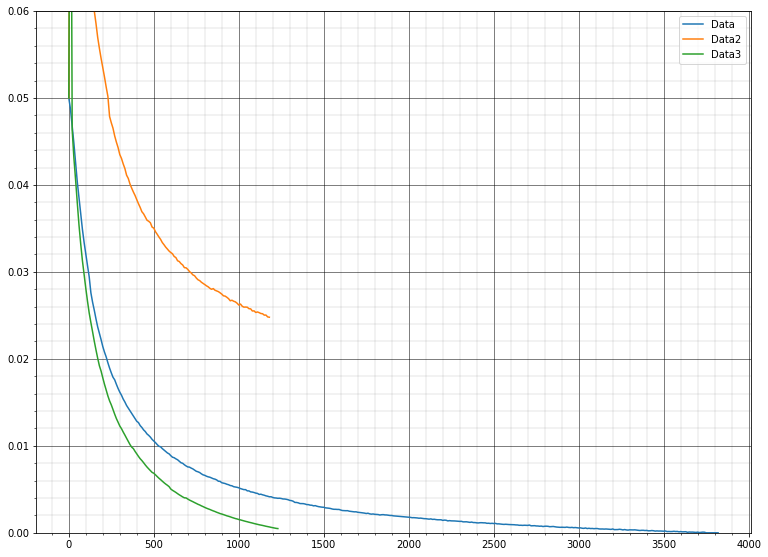

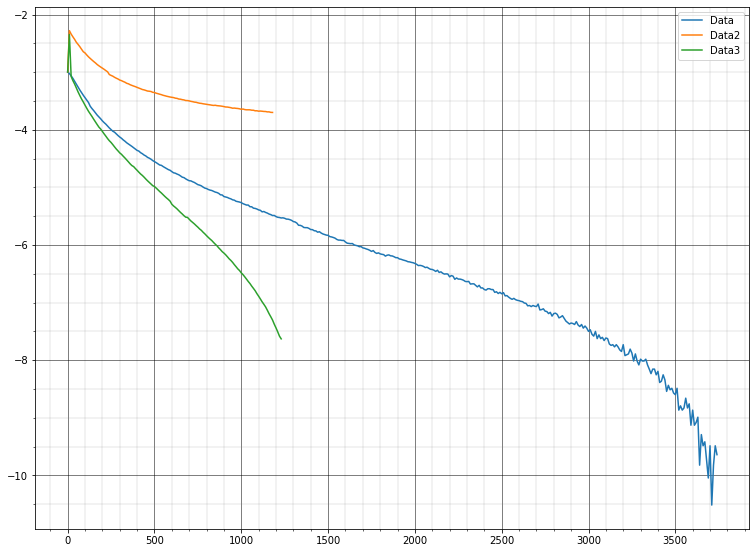

In [47]:
import pandas as pd
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Data Concentration/25CSteady.csv")
data2 = pd.read_csv("Data Concentration/25Cdata2.csv")
data3 = pd.read_csv("Data Concentration/25Cdata3.csv")
tf = data["Time (sec)"][len(data["Time (sec)"])-1]
tf2 = data2["Time (sec)"][len(data2["Time (sec)"])-1]
tf3 = data3["Time (sec)"][len(data3["Time (sec)"])-1]

plt.figure(1,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],data["Conc Ea (mol/L)"],label="Data")
plt.plot(data2["Time (sec)"],data2["Conc Ea (mol/L)"],label="Data2")
plt.plot(data3["Time (sec)"],data3["Conc Ea (mol/L)"],label="Data3")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
plt.ylim(0,0.06)
plt.legend()

# _A = 1/data["Conc Ea (mol/L)"]
_A = np.log(data["Conc Ea (mol/L)"])
_A2 = np.log(data2["Conc Ea (mol/L)"])
_A3 = np.log(data3["Conc Ea (mol/L)"])

plt.figure(2,figsize=[6.4*2,4.8*2])
plt.plot(data["Time (sec)"],_A,label="Data")
plt.plot(data2["Time (sec)"],_A2,label="Data2")
plt.plot(data3["Time (sec)"],_A3,label="Data3")

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='gray')
plt.legend()


In [40]:
from scipy.interpolate import interp1d
import pandas as pd
import os

updateFile = False
T = 25

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        temp = pd.DataFrame(columns=["K (s^-1)"])
        temp.to_csv("Kvalues/47CK.csv", index=False, encoding='utf8')
ensure_dir("Kvalues/47CK.csv")
try:
    myKs = pd.read_csv("Kvalues/47CK.csv")
except:
    temp = pd.DataFrame(columns=["Temperature (°C)","K (s^-1)"])
    temp.to_csv("Kvalues/47CK.csv", index=False, encoding='utf8')
    myKs = pd.read_csv("Kvalues/47CK.csv")

dataTerp1 = interp1d(data["Time (sec)"],_A)
dataTerp2 = interp1d(data2["Time (sec)"],_A2)
dataTerp3 = interp1d(data3["Time (sec)"],_A3)

k1 = -(dataTerp1(900)-dataTerp1(1000))/(900-1000) #s^-1
k2 = -(dataTerp2(900)-dataTerp2(1000))/(900-1000) #s^-1
k3 = -(dataTerp3(900)-dataTerp3(1000))/(900-1000) #s^-1
kavg = (k1 + k2 + k3)/3

print("k1 =",k1,"s^-1")
print("k2 =",k2,"s^-1")
print("k3 =",k3,"s^-1")
print("kavg =",kavg,"s^-1")

if updateFile:
    df = pd.DataFrame(data={'Temperature (°C)': [T], 'K (s^-1)': [kavg]})
    myKs = myKs.append(df)
    myKs.to_csv("Kvalues/47CK.csv", index=False, encoding='utf8')

myKs

k1 = 0.0010630346716569684 s^-1
k2 = 0.00046906985587635397 s^-1
k3 = 0.003437715391028249 s^-1
kavg = 0.0016566066395205237 s^-1


,Temperature (°C),K (s^-1)
0,47,0.005902
